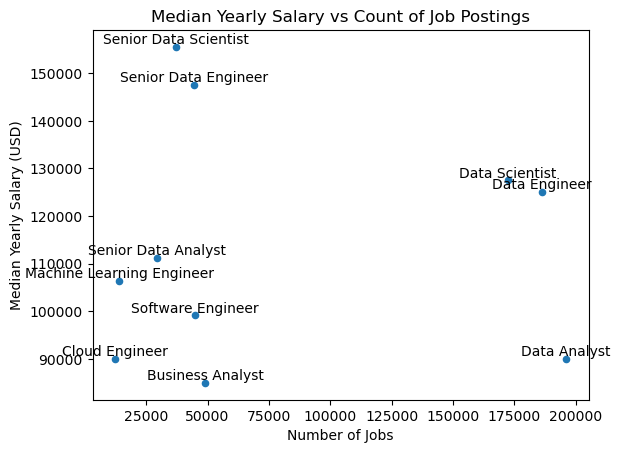

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
   job_count = job_title_stats['job_count'].iloc[i]
   mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
   job_title = job_title_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

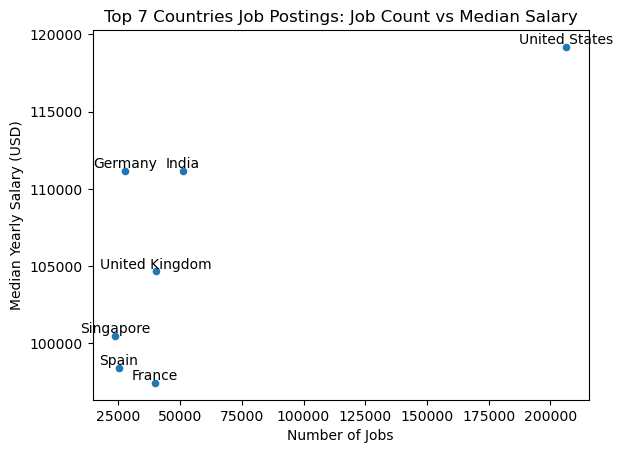

In [2]:
df = dataset['train'].to_pandas()

# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
   job_count = top_countries['job_count'].iloc[i]
   mean_salary = top_countries['median_salary_year_avg'].iloc[i]
   country = top_countries.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

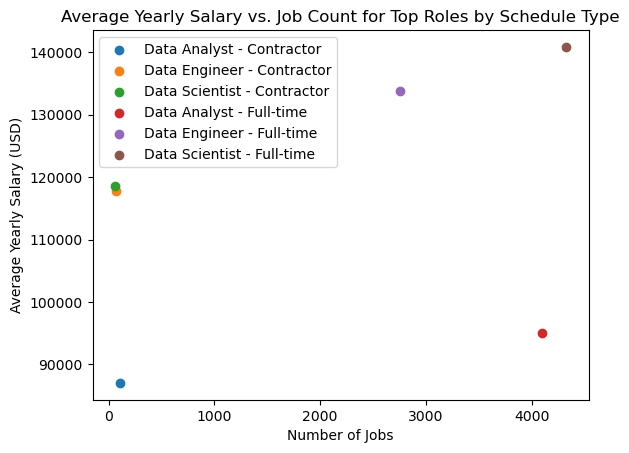

In [3]:
df = dataset['train'].to_pandas()

# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()